# Import required libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from datetime import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


# Read Shipping Routing Dataset

In [95]:
routes_df=pd.read_csv("../../Files/shipping_routes.csv")

# Display the Data

In [96]:
routes_df

,RouteID,POL,POD,High_Incidents,Medium_Incidents,Low_Incidents,No_Of_Travels,No_Of_Transhipments,Average_Transit_Days,Distance,...,Total_Revenue,Regulatory_Compliance,Previous_Safety_Awards,Emergency_Response_Plans,Cargo_Type,Ship_Type,Average_Vessel_Age,Cargo_Value,RiskScore,Risk_Category
0,0,PortC,PortX,0.0,1.0,0,21.0,2,20.0,1517,...,1067291.0,compliant,no,not in place,hazardous,bulk carrier,9,339388,37,Medium
1,1,PortC,PortX,0.0,1.0,6,80.0,0,16.0,1795,...,940188.0,compliant,no,not in place,non-hazardous,container,16,520465,38,Medium
2,2,PortB,PortX,0.0,2.0,6,10.0,2,21.0,1271,...,947974.0,non-compliant,no,in place,non-hazardous,container,5,589076,14,Low
3,3,PortC,PortY,1.0,1.0,6,42.0,2,19.0,1461,...,783990.0,compliant,no,not in place,non-hazardous,bulk carrier,16,387709,31,Medium
4,4,PortA,PortZ,0.0,1.0,5,23.0,0,19.0,1356,...,905045.0,non-compliant,yes,not in place,hazardous,container,12,340003,18,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1395,PortB,PortY,46.0,8.0,24,18.0,5,44.0,2259,...,1063255.0,compliant,no,in place,hazardous,container,11,797198,64,High
1425,1396,PortB,PortX,38.0,8.0,11,82.0,5,42.0,2657,...,994247.0,non-compliant,no,in place,hazardous,bulk carrier,4,904826,70,High
1426,1397,PortC,PortX,37.0,8.0,12,85.0,5,37.0,2413,...,1145866.0,non-compliant,no,in place,hazardous,bulk carrier,9,937778,56,Medium
1427,1398,PortA,PortY,32.0,6.0,29,10.0,6,45.0,2397,...,946270.0,compliant,no,not in place,hazardous,container,1,699748,33,Medium


# Shape of the Dataset

In [97]:
routes_df.shape

(1429, 25)

# Information about Dataset

In [98]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RouteID                   1429 non-null   int64  
 1   POL                       1429 non-null   object 
 2   POD                       1429 non-null   object 
 3   High_Incidents            1419 non-null   float64
 4   Medium_Incidents          1422 non-null   float64
 5   Low_Incidents             1429 non-null   int64  
 6   No_Of_Travels             1419 non-null   float64
 7   No_Of_Transhipments       1429 non-null   int64  
 8   Average_Transit_Days      1423 non-null   float64
 9   Distance                  1429 non-null   int64  
 10  Crew_Experience_Level     1416 non-null   float64
 11  Training_Programs         1429 non-null   object 
 12  Navigational_Risks        1414 non-null   object 
 13  Carbon_Emissions          1429 non-null   int64  
 14  Operatio

# Data Pre Processing

In [99]:
routes_df.nunique()

RouteID                     1422
POL                            3
POD                            3
High_Incidents                29
Medium_Incidents              15
Low_Incidents                 30
No_Of_Travels                 90
No_Of_Transhipments            7
Average_Transit_Days          43
Distance                     841
Crew_Experience_Level         17
Training_Programs              2
Navigational_Risks             2
Carbon_Emissions             730
Operational_Cost            1398
Total_Revenue               1397
Regulatory_Compliance          2
Previous_Safety_Awards         2
Emergency_Response_Plans       2
Cargo_Type                     3
Ship_Type                      2
Average_Vessel_Age            31
Cargo_Value                 1398
RiskScore                     77
Risk_Category                  3
dtype: int64

In [100]:
routes_df.isnull().sum()

RouteID                      0
POL                          0
POD                          0
High_Incidents              10
Medium_Incidents             7
Low_Incidents                0
No_Of_Travels               10
No_Of_Transhipments          0
Average_Transit_Days         6
Distance                     0
Crew_Experience_Level       13
Training_Programs            0
Navigational_Risks          15
Carbon_Emissions             0
Operational_Cost             9
Total_Revenue                7
Regulatory_Compliance       12
Previous_Safety_Awards       0
Emergency_Response_Plans    18
Cargo_Type                  10
Ship_Type                   17
Average_Vessel_Age           0
Cargo_Value                  0
RiskScore                    0
Risk_Category                0
dtype: int64

# Data Cleaning  (Datatype, Null values , Outlier detection, balanced )

In [101]:
#DataType

In [102]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RouteID                   1429 non-null   int64  
 1   POL                       1429 non-null   object 
 2   POD                       1429 non-null   object 
 3   High_Incidents            1419 non-null   float64
 4   Medium_Incidents          1422 non-null   float64
 5   Low_Incidents             1429 non-null   int64  
 6   No_Of_Travels             1419 non-null   float64
 7   No_Of_Transhipments       1429 non-null   int64  
 8   Average_Transit_Days      1423 non-null   float64
 9   Distance                  1429 non-null   int64  
 10  Crew_Experience_Level     1416 non-null   float64
 11  Training_Programs         1429 non-null   object 
 12  Navigational_Risks        1414 non-null   object 
 13  Carbon_Emissions          1429 non-null   int64  
 14  Operatio

# Null Value treatment

In [103]:
routes_df.isna().sum()/routes_df.shape[0]

RouteID                     0.000000
POL                         0.000000
POD                         0.000000
High_Incidents              0.006998
Medium_Incidents            0.004899
Low_Incidents               0.000000
No_Of_Travels               0.006998
No_Of_Transhipments         0.000000
Average_Transit_Days        0.004199
Distance                    0.000000
Crew_Experience_Level       0.009097
Training_Programs           0.000000
Navigational_Risks          0.010497
Carbon_Emissions            0.000000
Operational_Cost            0.006298
Total_Revenue               0.004899
Regulatory_Compliance       0.008397
Previous_Safety_Awards      0.000000
Emergency_Response_Plans    0.012596
Cargo_Type                  0.006998
Ship_Type                   0.011896
Average_Vessel_Age          0.000000
Cargo_Value                 0.000000
RiskScore                   0.000000
Risk_Category               0.000000
dtype: float64

<Axes: >

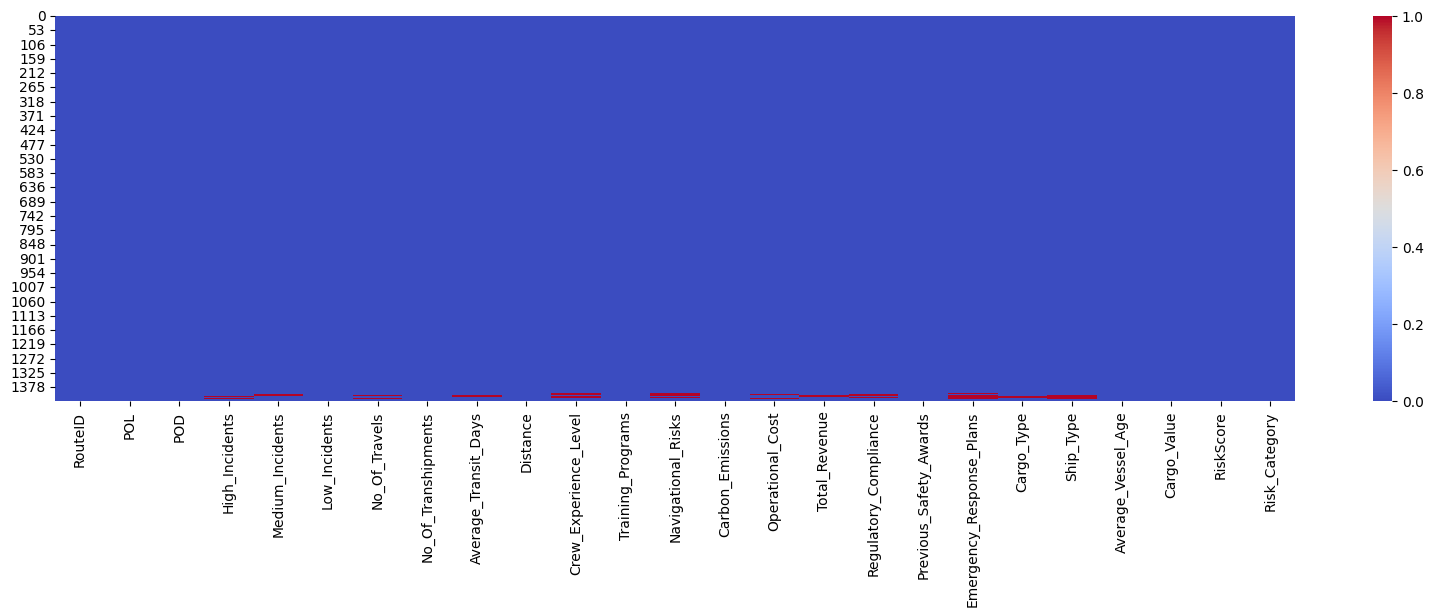

In [104]:
plt.figure(figsize=(20,5))
sns.heatmap(routes_df.isnull(),cmap="coolwarm")

In [105]:
# Filling Multiple Categorical Columns with Mode

In [106]:
categorical_columns = ['Training_Programs'	,'Navigational_Risks','Regulatory_Compliance',
                       'Previous_Safety_Awards',
                       'Emergency_Response_Plans','Cargo_Type','Ship_Type'


]  # Replace with your categorical column names

for col in categorical_columns:
    routes_df[col].fillna(routes_df[col].mode()[0], inplace=True)

C:\Users\local_ponsingh.arumugaraj9\Temp\ipykernel_21692\3871518975.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  routes_df[col].fillna(routes_df[col].mode()[0], inplace=True)


In [107]:
#Filling Multiple Numerical Columns with Mean:

In [108]:
numerical_columns = ['High_Incidents',	'Medium_Incidents',	'Low_Incidents',	'No_Of_Travels',	'No_Of_Transhipments',	
                     'Average_Transit_Days',
                     'Distance',	'Crew_Experience_Level','Carbon_Emissions'	,'Operational_Cost'	,'Average_Vessel_Age'

]  # Replace with your numerical column names

for col in numerical_columns:
    routes_df[col].fillna(routes_df[col].mean(), inplace=True)

C:\Users\local_ponsingh.arumugaraj9\Temp\ipykernel_21692\3885271479.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  routes_df[col].fillna(routes_df[col].mean(), inplace=True)


In [109]:
routes_df.isna().sum()

RouteID                     0
POL                         0
POD                         0
High_Incidents              0
Medium_Incidents            0
Low_Incidents               0
No_Of_Travels               0
No_Of_Transhipments         0
Average_Transit_Days        0
Distance                    0
Crew_Experience_Level       0
Training_Programs           0
Navigational_Risks          0
Carbon_Emissions            0
Operational_Cost            0
Total_Revenue               0
Regulatory_Compliance       0
Previous_Safety_Awards      0
Emergency_Response_Plans    0
Cargo_Type                  0
Ship_Type                   0
Average_Vessel_Age          0
Cargo_Value                 0
RiskScore                   0
Risk_Category               0
dtype: int64

<Axes: >

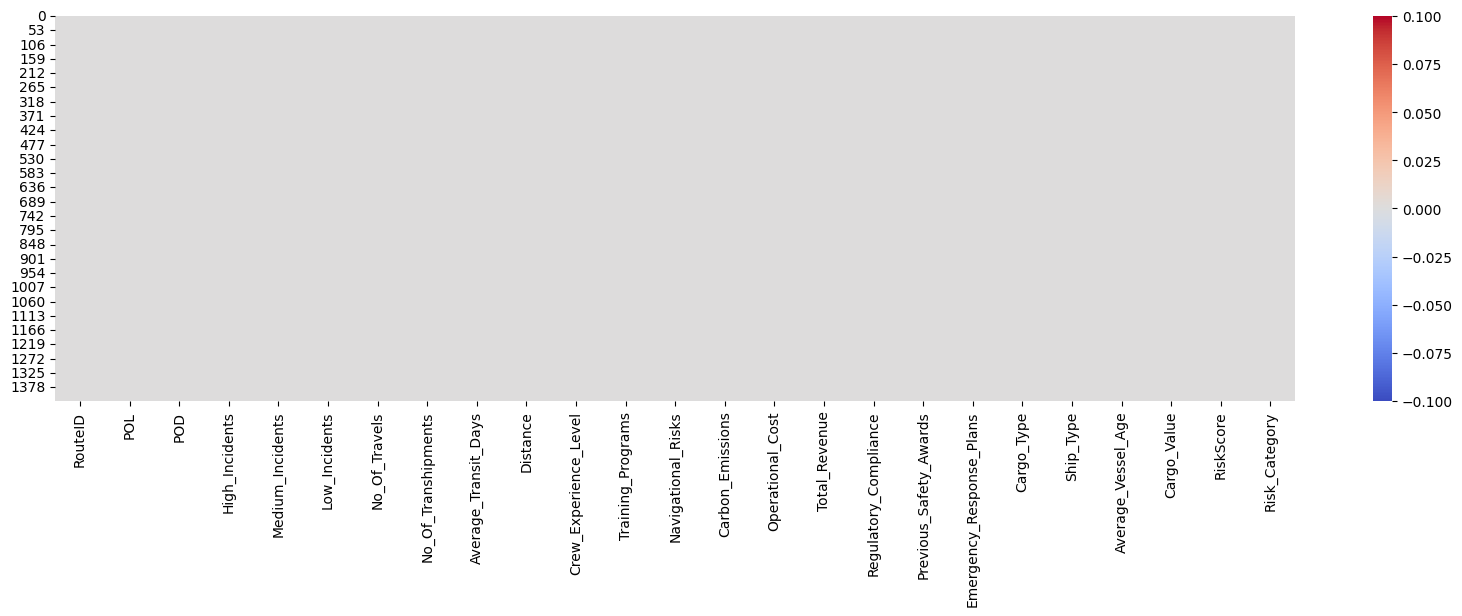

In [110]:
plt.figure(figsize=(20,5))
sns.heatmap(routes_df.isnull(),cmap="coolwarm")

In [111]:
# Drop the unwanted features

unwanted_features = ['POL',	'POD','Risk_Category']
routes_df = routes_df.drop(columns=unwanted_features)

In [112]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Training_Programs'	,'Navigational_Risks','Regulatory_Compliance',
                       'Previous_Safety_Awards',
                       'Emergency_Response_Plans','Cargo_Type','Ship_Type']  # Replace with your categorical columns

for col in categorical_columns:
    routes_df[col] = label_encoder.fit_transform(routes_df[col])

In [113]:
routes_df

,RouteID,High_Incidents,Medium_Incidents,Low_Incidents,No_Of_Travels,No_Of_Transhipments,Average_Transit_Days,Distance,Crew_Experience_Level,Training_Programs,...,Operational_Cost,Total_Revenue,Regulatory_Compliance,Previous_Safety_Awards,Emergency_Response_Plans,Cargo_Type,Ship_Type,Average_Vessel_Age,Cargo_Value,RiskScore
0,0,0.0,1.0,0,21.0,2,20.0,1517,12.0,0,...,407396.0,1067291.0,0,0,1,1,0,9,339388,37
1,1,0.0,1.0,6,80.0,0,16.0,1795,12.0,1,...,418250.0,940188.0,0,0,1,2,1,16,520465,38
2,2,0.0,2.0,6,10.0,2,21.0,1271,15.0,1,...,227480.0,947974.0,1,0,0,2,1,5,589076,14
3,3,1.0,1.0,6,42.0,2,19.0,1461,16.0,0,...,359124.0,783990.0,0,0,1,2,0,16,387709,31
4,4,0.0,1.0,5,23.0,0,19.0,1356,16.0,1,...,256332.0,905045.0,1,1,1,1,1,12,340003,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1395,46.0,8.0,24,18.0,5,44.0,2259,10.0,0,...,608915.0,1063255.0,0,0,0,1,1,11,797198,64
1425,1396,38.0,8.0,11,82.0,5,42.0,2657,9.0,1,...,657873.0,994247.0,1,0,0,1,0,4,904826,70
1426,1397,37.0,8.0,12,85.0,5,37.0,2413,9.0,0,...,549018.0,1145866.0,1,0,0,1,0,9,937778,56
1427,1398,32.0,6.0,29,10.0,6,45.0,2397,10.0,1,...,359121.0,946270.0,0,0,1,1,1,1,699748,33


In [114]:
# Finding Outliers

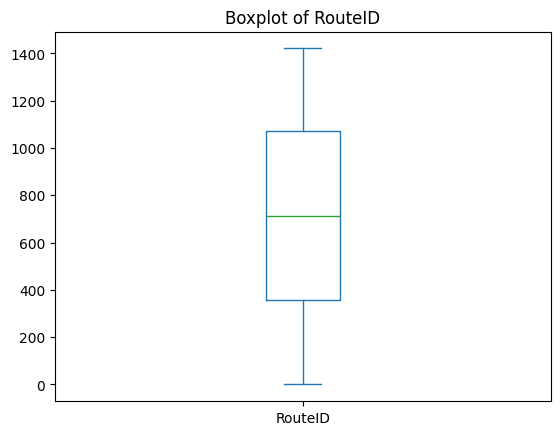

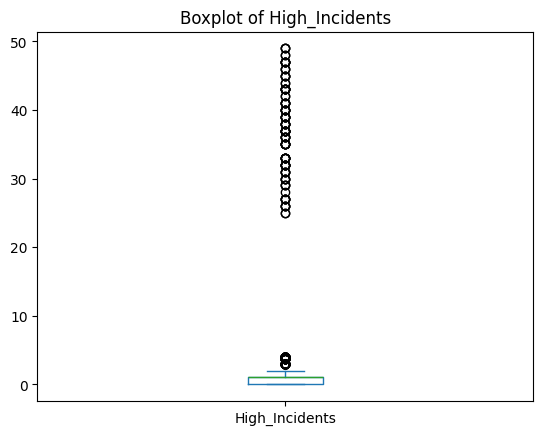

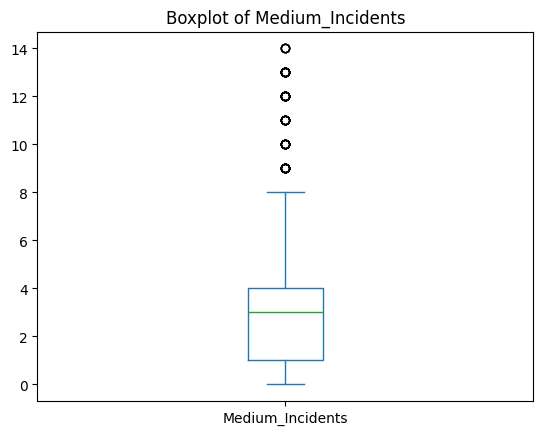

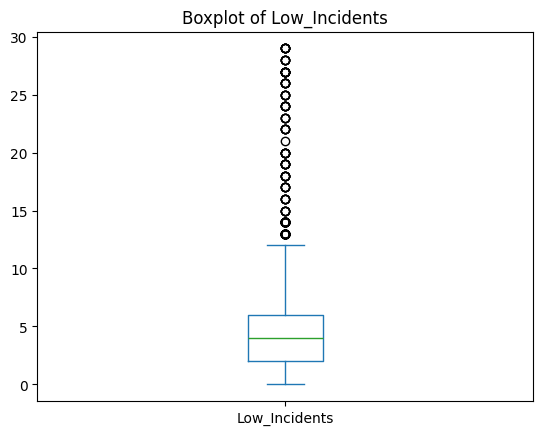

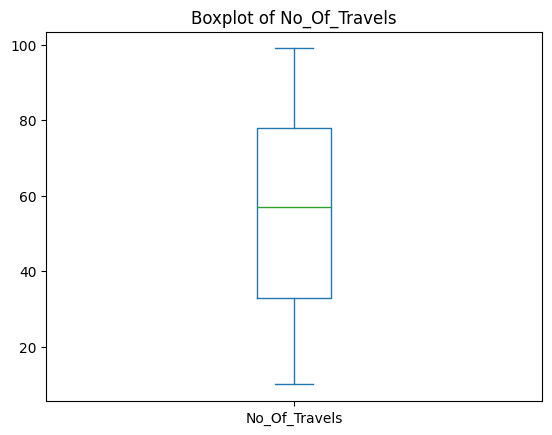

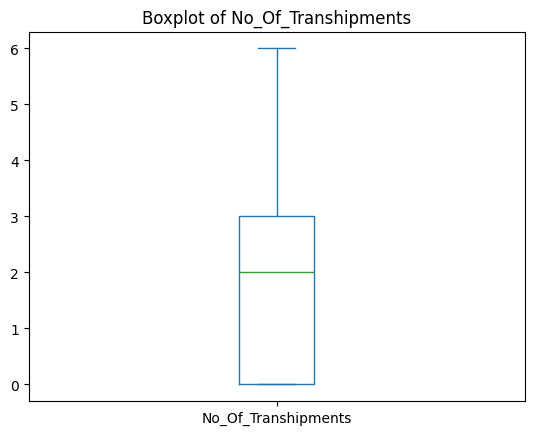

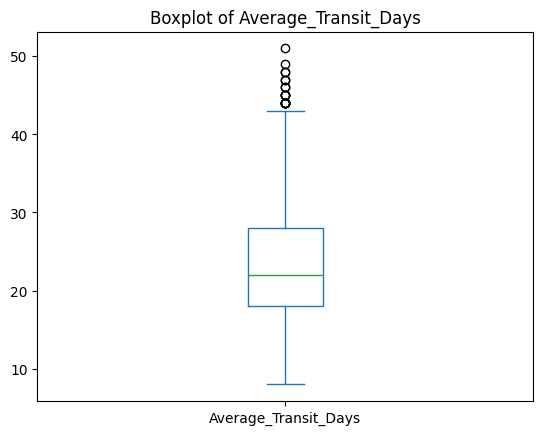

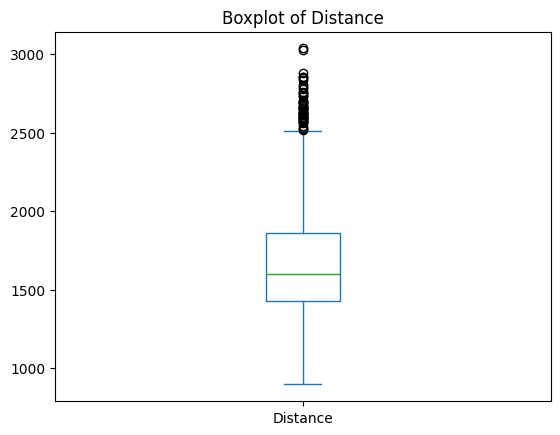

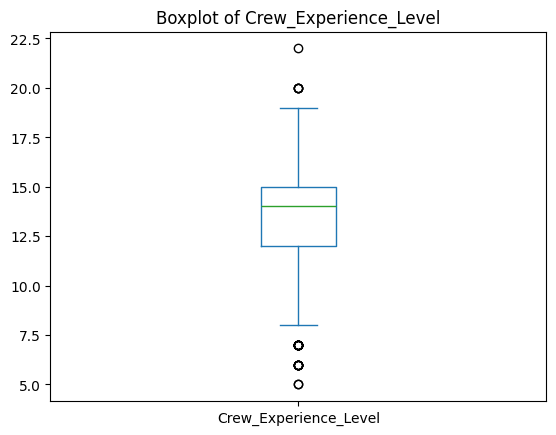

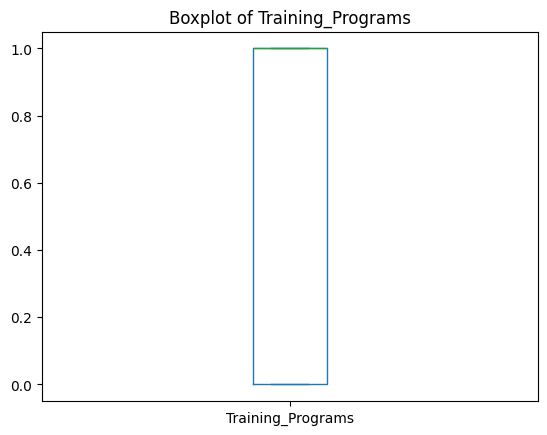

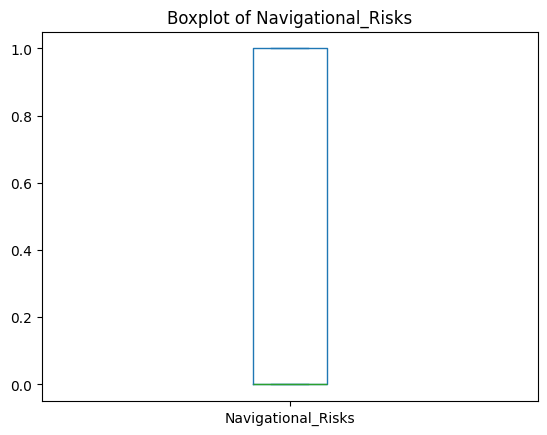

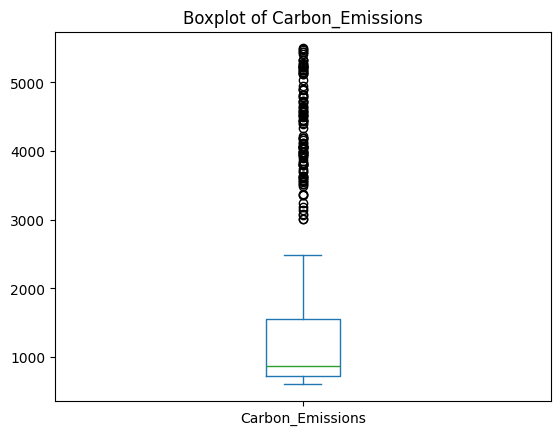

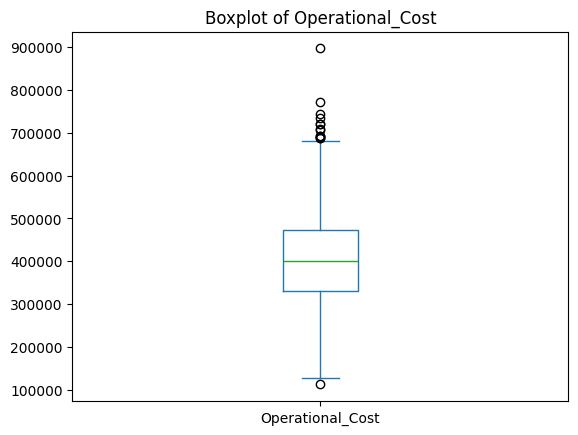

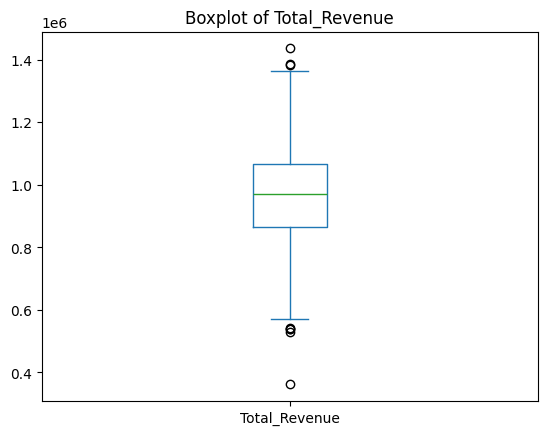

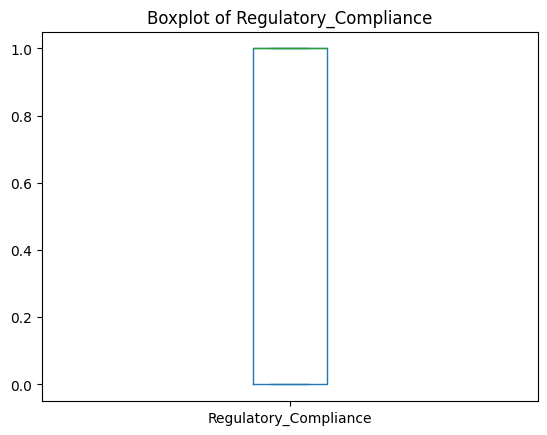

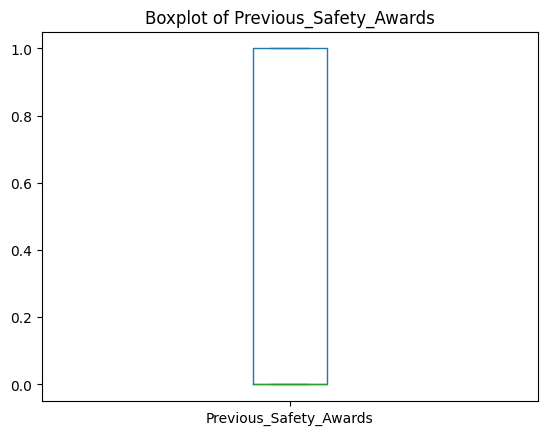

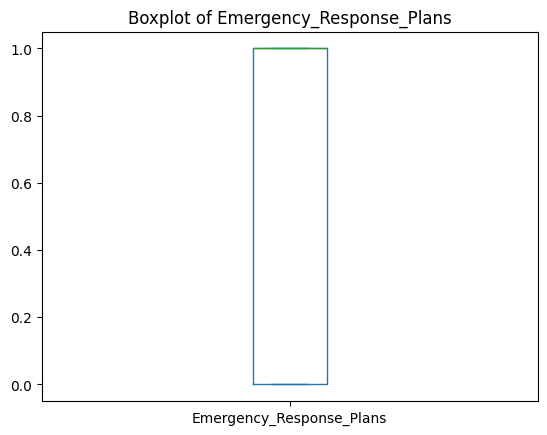

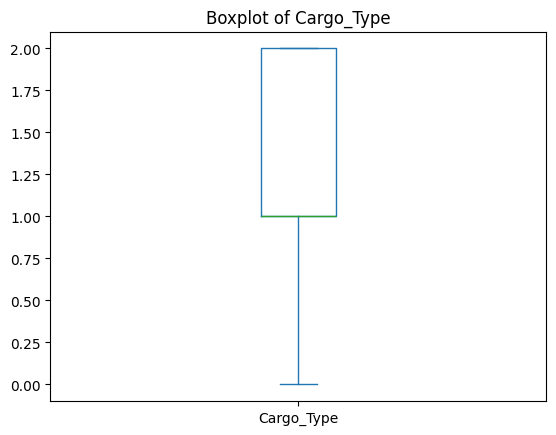

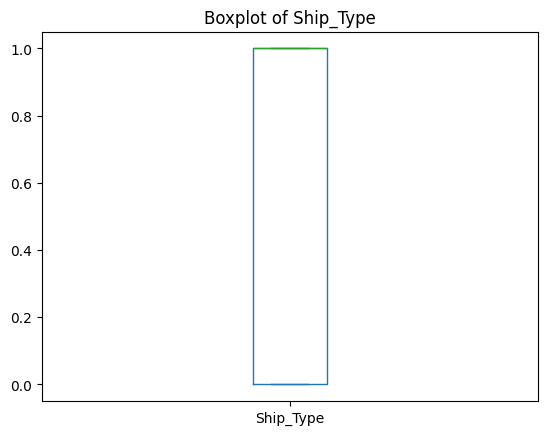

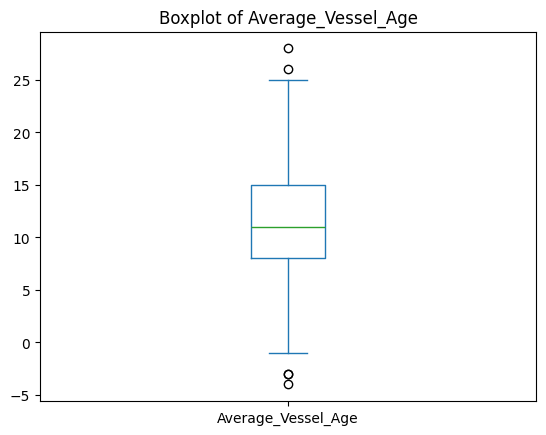

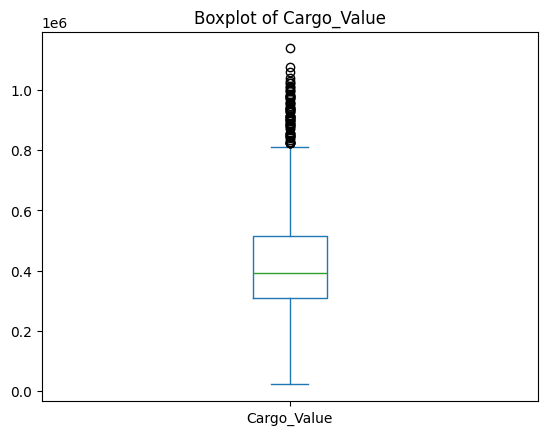

In [115]:
# Assuming 'RiskScore' features include 'RiskScore' in their column names
for column in routes_df.columns:
    if 'RiskScore' not in column:
        routes_df[column].plot(kind="box")
        plt.title(f'Boxplot of {column}')
        plt.show()

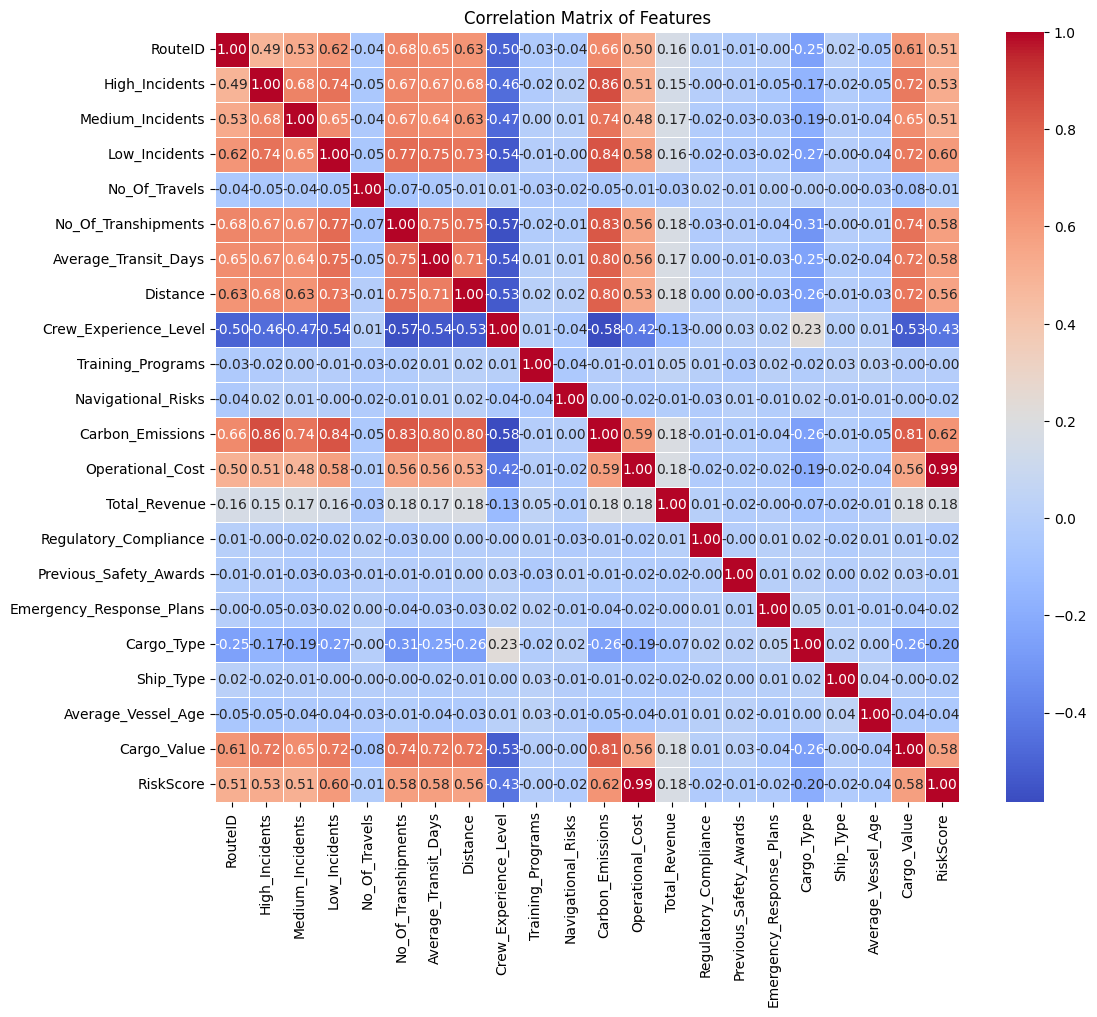

In [116]:
correlation_matrix = routes_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Features')
plt.show()

#Metrics

In [117]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example data
# Assume 'routes_df' is your DataFrame and 'RiskScore' is your target variable
X = routes_df.drop(columns=['RiskScore'])  # Features
y = routes_df['RiskScore']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Calculate feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
12,Operational_Cost,0.994838
0,RouteID,0.001077
11,Carbon_Emissions,0.000835
5,No_Of_Transhipments,0.000559
7,Distance,0.000491
20,Cargo_Value,0.000472
1,High_Incidents,0.000393
2,Medium_Incidents,0.000324
3,Low_Incidents,0.000298
4,No_Of_Travels,0.000168


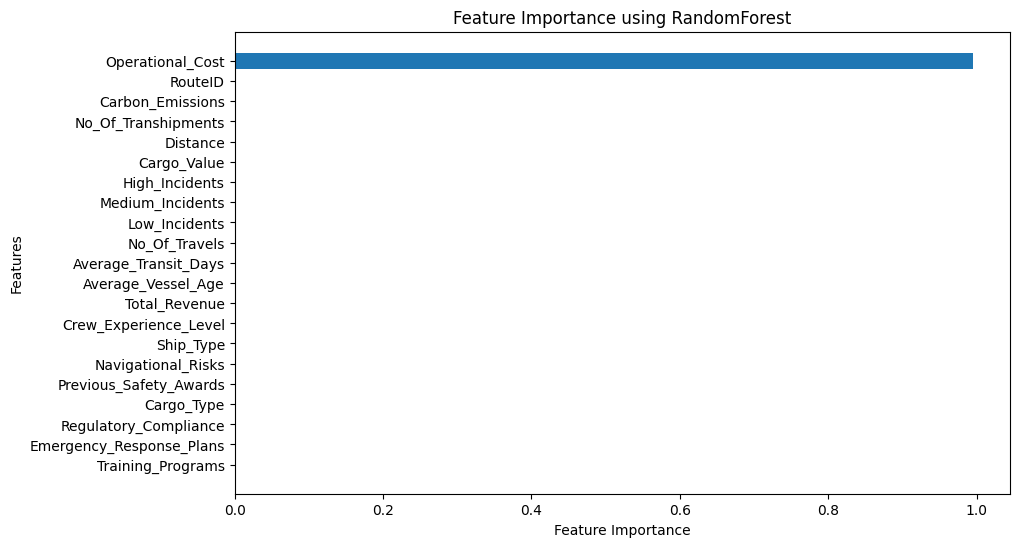

In [118]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using RandomForest')
plt.gca().invert_yaxis()
plt.show()

# Model Generation and Find Best Model

In [119]:
routes_df.drop(columns=['RouteID'],inplace=True) 

In [120]:
routes_df

,High_Incidents,Medium_Incidents,Low_Incidents,No_Of_Travels,No_Of_Transhipments,Average_Transit_Days,Distance,Crew_Experience_Level,Training_Programs,Navigational_Risks,...,Operational_Cost,Total_Revenue,Regulatory_Compliance,Previous_Safety_Awards,Emergency_Response_Plans,Cargo_Type,Ship_Type,Average_Vessel_Age,Cargo_Value,RiskScore
0,0.0,1.0,0,21.0,2,20.0,1517,12.0,0,0,...,407396.0,1067291.0,0,0,1,1,0,9,339388,37
1,0.0,1.0,6,80.0,0,16.0,1795,12.0,1,0,...,418250.0,940188.0,0,0,1,2,1,16,520465,38
2,0.0,2.0,6,10.0,2,21.0,1271,15.0,1,0,...,227480.0,947974.0,1,0,0,2,1,5,589076,14
3,1.0,1.0,6,42.0,2,19.0,1461,16.0,0,0,...,359124.0,783990.0,0,0,1,2,0,16,387709,31
4,0.0,1.0,5,23.0,0,19.0,1356,16.0,1,1,...,256332.0,905045.0,1,1,1,1,1,12,340003,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,46.0,8.0,24,18.0,5,44.0,2259,10.0,0,0,...,608915.0,1063255.0,0,0,0,1,1,11,797198,64
1425,38.0,8.0,11,82.0,5,42.0,2657,9.0,1,1,...,657873.0,994247.0,1,0,0,1,0,4,904826,70
1426,37.0,8.0,12,85.0,5,37.0,2413,9.0,0,0,...,549018.0,1145866.0,1,0,0,1,0,9,937778,56
1427,32.0,6.0,29,10.0,6,45.0,2397,10.0,1,1,...,359121.0,946270.0,0,0,1,1,1,1,699748,33


In [121]:
# Example DataFrame 'routes_df' and target 'RiskScore'


X = routes_df.drop(columns=['RiskScore'])
y = routes_df['RiskScore']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
# Initialize models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store model performance
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}


results

{'Linear Regression': {'MAE': 0.43023226276671406,
  'MSE': 3.3384004097615776,
  'R2': 0.9832384457113152},
 'Decision Tree': {'MAE': 0.47086247086247085,
  'MSE': 5.557109557109557,
  'R2': 0.9720986753843847},
 'Random Forest': {'MAE': 0.4241491841491841,
  'MSE': 4.647128205128204,
  'R2': 0.9766675406973433},
 'Support Vector Regression': {'MAE': 1.6892814432227548,
  'MSE': 7.335674827675453,
  'R2': 0.9631687943996503},
 'K-Nearest Neighbors': {'MAE': 1.6857808857808858,
  'MSE': 7.099114219114219,
  'R2': 0.9643565259465819},
 'Gradient Boosting': {'MAE': 0.4265669965357447,
  'MSE': 3.3455043084814884,
  'R2': 0.9832027782150775}}

The results_df DataFrame will show the performance metrics for each model:

MAE: Mean Absolute Error
MSE: Mean Squared Error
R2: R-squared score
Choose the model with the lowest MAE and MSE and the highest R-squared score as the best-performing model.

# To find best model for all the metrics

In [123]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results).T

# Display the results
print("Model Performance Metrics:")
print(results_df)

# Find the best model based on each metric
best_mae_model = results_df['MAE'].idxmin()
best_mse_model = results_df['MSE'].idxmin()
best_r2_model = results_df['R2'].idxmax()

print("\nBest Model based on MAE:", best_mae_model)
print("Best Model based on MSE:", best_mse_model)
print("Best Model based on R2:", best_r2_model)

Model Performance Metrics:
                                MAE       MSE        R2
Linear Regression          0.430232  3.338400  0.983238
Decision Tree              0.470862  5.557110  0.972099
Random Forest              0.424149  4.647128  0.976668
Support Vector Regression  1.689281  7.335675  0.963169
K-Nearest Neighbors        1.685781  7.099114  0.964357
Gradient Boosting          0.426567  3.345504  0.983203

Best Model based on MAE: Random Forest
Best Model based on MSE: Linear Regression
Best Model based on R2: Linear Regression


# To find Over All best Model

In [124]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results).T

# Display the results
print("Model Performance Metrics:")
print(results_df)

# Select the best model based on each metric
# Assuming we prioritize minimizing MAE and MSE, and maximizing R2
best_mae_model = results_df['MAE'].idxmin()
best_mse_model = results_df['MSE'].idxmin()
best_r2_model = results_df['R2'].idxmax()

# Find the overall best model by combining priorities
# For simplicity, let's assume the best model is the one with the lowest MAE or MSE
# and highest R2 score. You can adjust the weighting based on your requirements.

# Combine all metrics into a single criterion
# Create a composite score: Minimize MAE and MSE, Maximize R2
results_df['Composite'] = results_df['R2'] - results_df['MAE'] - results_df['MSE'] / 1000

# Select the best model based on the composite score
best_model = results_df['Composite'].idxmax()

print("\nBest Overall Model:", best_model)

Model Performance Metrics:
                                MAE       MSE        R2
Linear Regression          0.430232  3.338400  0.983238
Decision Tree              0.470862  5.557110  0.972099
Random Forest              0.424149  4.647128  0.976668
Support Vector Regression  1.689281  7.335675  0.963169
K-Nearest Neighbors        1.685781  7.099114  0.964357
Gradient Boosting          0.426567  3.345504  0.983203

Best Overall Model: Gradient Boosting


# Visualize the Decision Tree

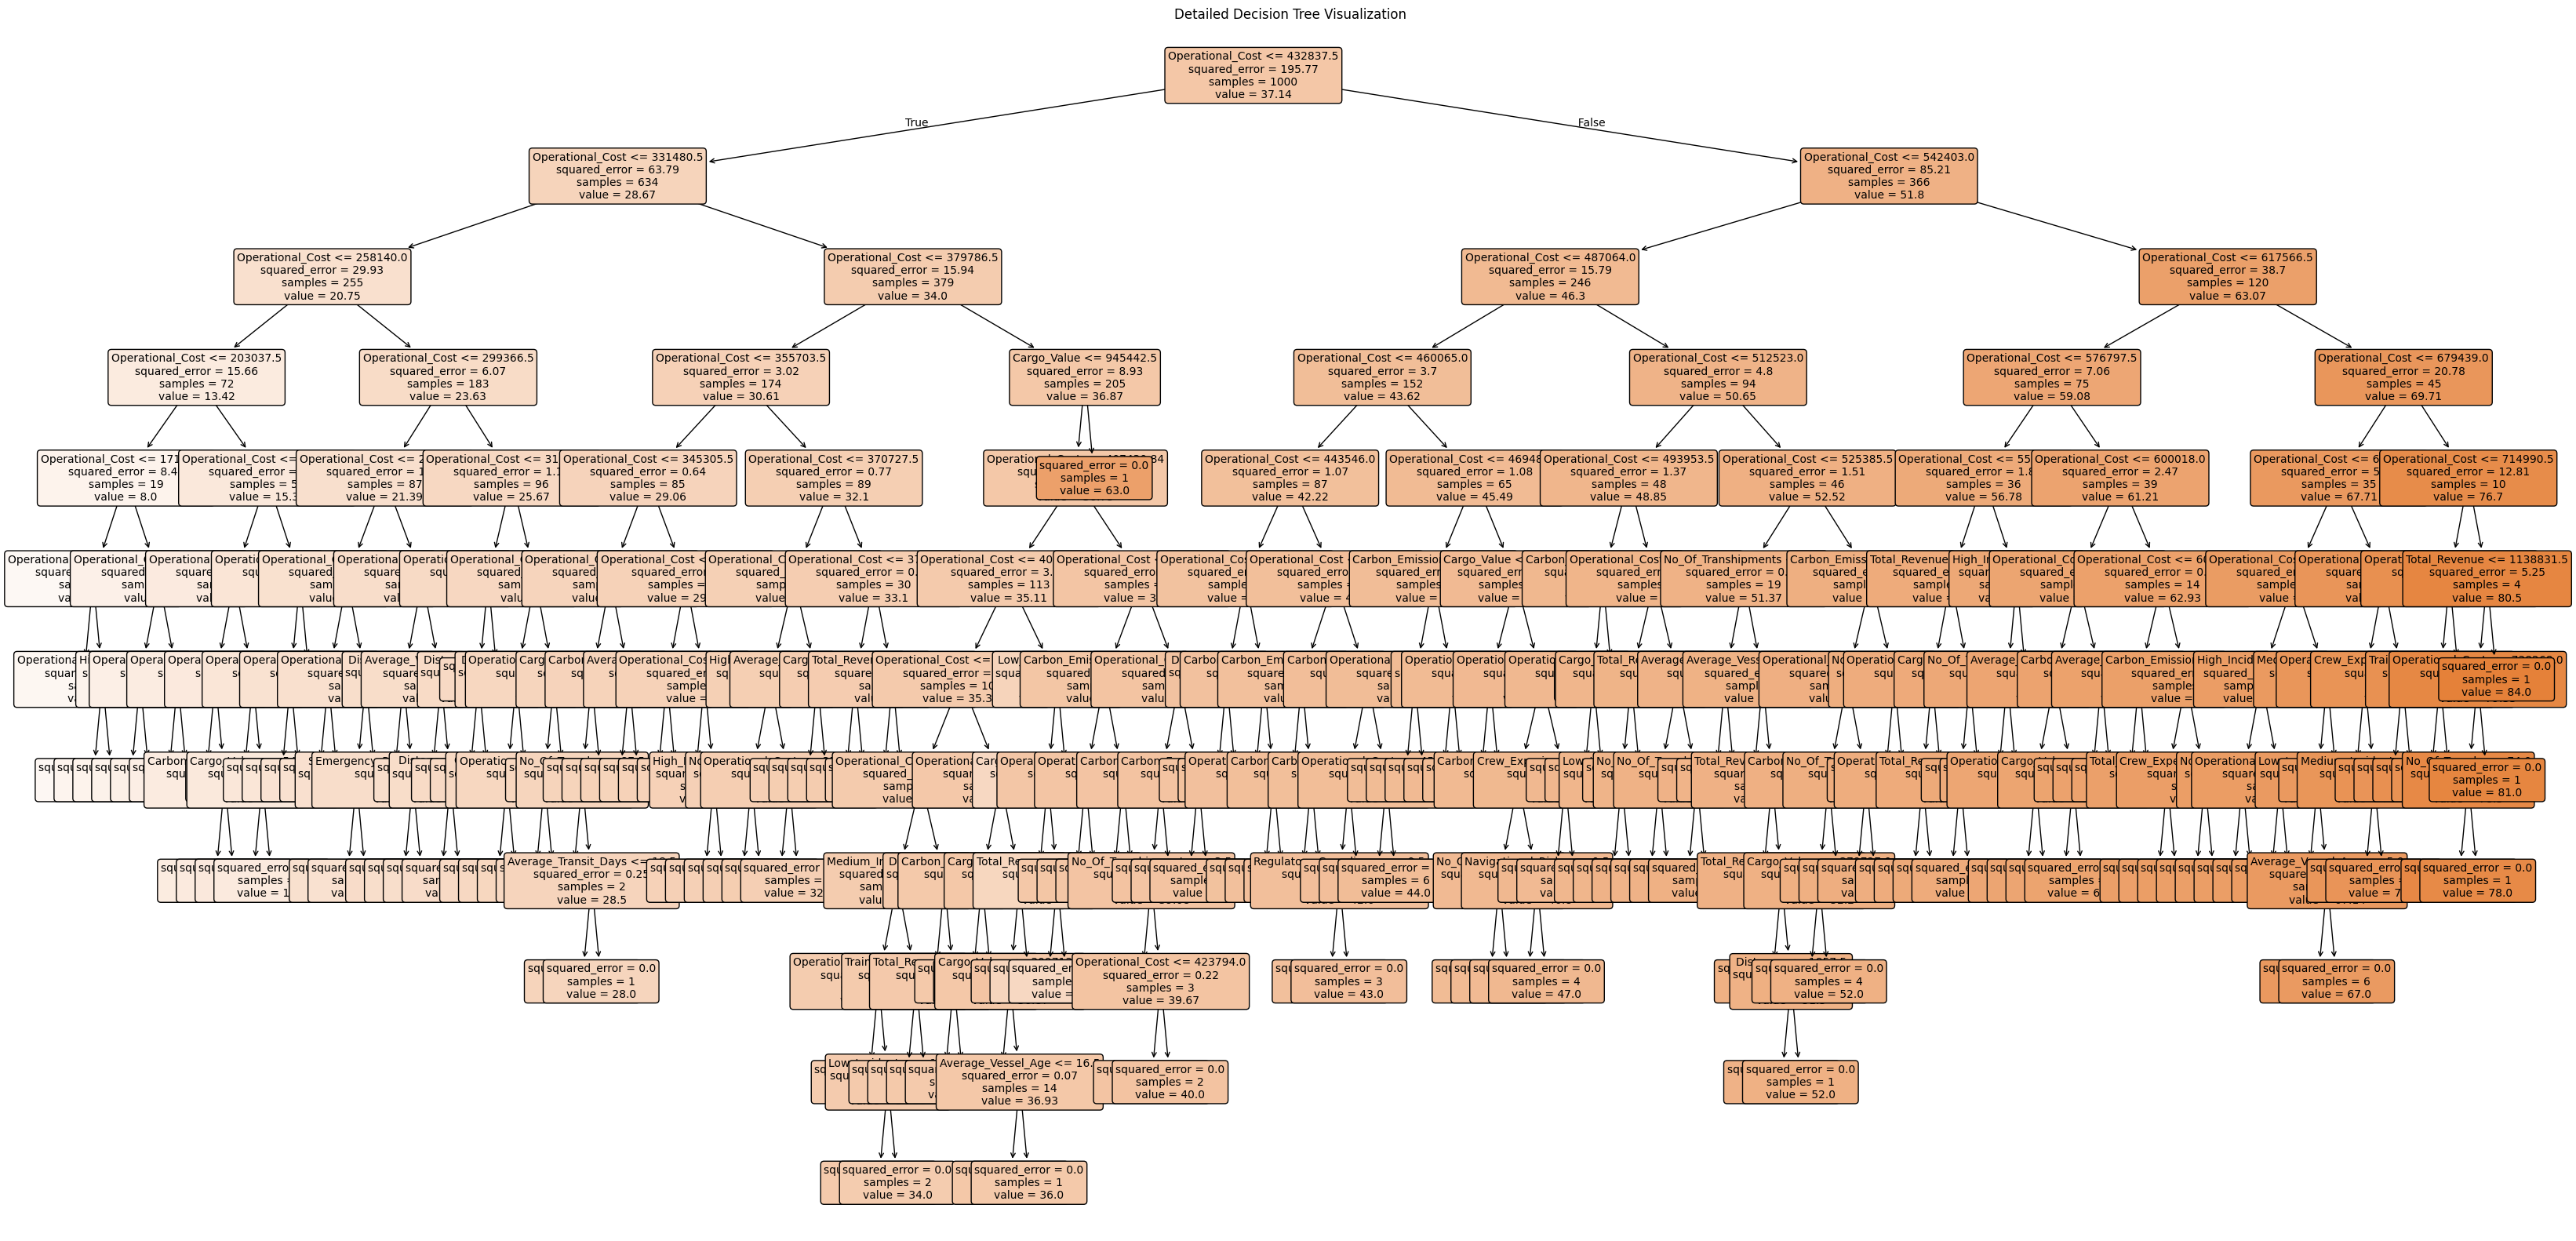

In [125]:
riskModel=models['Decision Tree']

# Plot the decision tree
# Plot the decision tree with detailed options
plt.figure(figsize=(40, 20))  # Adjust the size for better readability
plot_tree(
    riskModel, 
    filled=True, 
    feature_names=X.columns, 
    rounded=True, 
    fontsize=10,  # Adjust the font size for readability
    precision=2  # Control the precision of the values shown in the nodes
)
plt.title("Detailed Decision Tree Visualization")
plt.show()
    

# Predict a Few Results

#Input Features

In [126]:
X_train

,High_Incidents,Medium_Incidents,Low_Incidents,No_Of_Travels,No_Of_Transhipments,Average_Transit_Days,Distance,Crew_Experience_Level,Training_Programs,Navigational_Risks,Carbon_Emissions,Operational_Cost,Total_Revenue,Regulatory_Compliance,Previous_Safety_Awards,Emergency_Response_Plans,Cargo_Type,Ship_Type,Average_Vessel_Age,Cargo_Value
573,1.0,4.0,3,69.0,0,18.0,1620,15.0,0,1,699,370595.0,1118102.0,1,0,1,2,1,14,360422
807,1.0,0.0,4,59.0,1,14.0,1584,15.0,0,1,999,322953.0,981452.0,1,0,1,1,1,7,465530
1229,4.0,2.0,13,70.0,3,32.0,2472,11.0,1,1,1421,394089.0,1033840.0,0,0,0,0,1,10,581298
585,0.0,1.0,6,14.0,0,20.0,1272,15.0,0,0,934,372847.0,719881.0,1,0,0,2,1,18,404730
1387,40.0,5.0,19,13.0,5,37.0,2421,11.0,1,1,3984,649508.0,613884.0,1,0,0,1,0,11,822995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4.0,1.0,5,90.0,4,27.0,1853,11.0,0,0,1717,462441.0,955256.0,0,1,0,2,1,4,567444
1130,1.0,3.0,14,68.0,3,29.0,1592,13.0,1,0,1454,631613.0,1357846.0,1,1,1,0,0,9,504251
1294,3.0,5.0,13,39.0,3,32.0,2114,8.0,0,1,1811,446141.0,681177.0,1,0,0,0,1,15,510635
860,1.0,3.0,5,41.0,1,18.0,1276,15.0,0,1,867,297391.0,1160847.0,0,0,0,2,0,11,92647


In [127]:
riskModel=models['Gradient Boosting']

In [132]:
# Predict using the trained model
y_pred = riskModel.predict(X_test)

# Display a few predictions alongside the actual values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Show the first few results
print(predictions_df.head(20))

      Actual  Predicted
123       44  44.379292
1189      43  43.236408
462       42  41.822180
351       37  37.250496
1009      37  36.459987
665       27  27.039073
756       40  39.778139
527       38  37.155801
70        20  20.143043
554       41  41.327944
332       30  30.405072
994       37  36.186026
1182      36  35.622011
1066      39  39.154794
310       26  26.071954
1307      61  61.059735
218       21  20.954148
78        49  47.771844
270       47  46.470054
51        45  45.165503


In [130]:
# Predict using the trained model
y_pred = riskModel.predict(X_test)

# Create a DataFrame with all the input features, actual values, and predicted values
predictions_df = X_test.copy()  # Copy the test features
predictions_df['Actual'] = y_test  # Add the actual values
predictions_df['Predicted'] = y_pred  # Add the predicted values

# Display the first few rows
predictions_df.head()

,High_Incidents,Medium_Incidents,Low_Incidents,No_Of_Travels,No_Of_Transhipments,Average_Transit_Days,Distance,Crew_Experience_Level,Training_Programs,Navigational_Risks,...,Total_Revenue,Regulatory_Compliance,Previous_Safety_Awards,Emergency_Response_Plans,Cargo_Type,Ship_Type,Average_Vessel_Age,Cargo_Value,Actual,Predicted
123,0.0,3.0,4,58.0,2,26.0,1330,15.0,1,1,...,970897.0,1,0,0,1,0,6,181842,44,44.379292
1189,4.0,1.0,11,72.0,4,29.0,2033,13.0,1,1,...,741207.0,0,0,1,0,0,8,411446,43,43.236408
462,1.0,2.0,1,16.0,0,20.0,1618,11.0,0,0,...,1038058.0,1,1,0,1,1,11,413771,42,41.822180
351,0.0,1.0,3,70.0,0,22.0,1552,15.0,0,0,...,903232.0,1,1,0,1,0,14,100765,37,37.250496
1009,4.0,6.0,13,36.0,4,39.0,2085,15.0,0,0,...,1210496.0,0,1,1,0,0,2,476754,37,36.459987


# Deploy the Model Local Environment

In [131]:
with open('riskModel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [133]:
routes_df.to_csv("final_model_consumed.csv",index=False)